### Business Problem 
The world is witnessing an alarming rise in global temperatures, leading to severe heat waves and other extreme weather events. These climate changes are increasingly attributed to human activities, particularly deforestation. Understanding the specific impact of deforestation on local temperature changes is crucial for developing effective environmental policies and conservation strategies.

In Kenya, the Mau Forest, a vital ecological region, has experienced significant deforestation over recent years. This project aims to analyze the relationship between deforestation and temperature changes in the Mau Forest from 2015 to 2020. By doing so, it seeks to provide insights into how local deforestation contributes to broader climate change patterns, thereby aiding in the formulation of targeted environmental interventions and policy decisions.

### Objectives:

1. Analyze the temperature trends in the Mau Forest from 2015 to 2020.
2. Examine the extent of deforestation in the Mau Forest during the same period.
3. Investigate the correlation between deforestation and temperature changes.
4. Develop predictive models to estimate the impact of deforestation on future temperature changes.

In [1]:
import pandas as pd

# Load the datasets
temperature_df = pd.read_csv('C:\\Users\\Lorrah\\Documents\\Hackathon GirlCode\\DataSets\\Monthly_Temperature_Mau_Forest_2015_2022.csv')
tree_loss_df = pd.read_csv('C:\\Users\\Lorrah\Documents\\Hackathon GirlCode\\DataSets\\TreeLoss Mau Forest.csv')

# Display the first few rows of each dataframe to understand their structure
temperature_df.head(), tree_loss_df.head()


(   system:index  month  temperature  year  \
 0      20150101      1    15.530855  2015   
 1      20150102      1    16.196031  2015   
 2      20150103      1    16.027412  2015   
 3      20150104      1    15.916709  2015   
 4      20150105      1    16.208306  2015   
 
                                      .geo  
 0  {"type":"MultiPoint","coordinates":[]}  
 1  {"type":"MultiPoint","coordinates":[]}  
 2  {"type":"MultiPoint","coordinates":[]}  
 3  {"type":"MultiPoint","coordinates":[]}  
 4  {"type":"MultiPoint","coordinates":[]}  ,
   country subnational1 subnational2  threshold  area_ha  extent_2000_ha  \
 0   Kenya      Baringo          805          0    17383           17383   
 1   Kenya      Baringo          805         10    17383            2875   
 2   Kenya      Baringo          805         15    17383            1280   
 3   Kenya      Baringo          805         20    17383             154   
 4   Kenya      Baringo          805         25    17383             10

In [2]:
# Drop unecessary columns 

temperature_df = temperature_df.drop(columns=['system:index', '.geo'])
tree_loss_df = tree_loss_df.drop(columns=['Unnamed: 15'])


In [3]:
# Convert month and year to datetime
temperature_df['date'] = pd.to_datetime(temperature_df[['year', 'month']].assign(day=1))
temperature_df = temperature_df.drop(columns=['month', 'year'])


In [4]:
# Reshape tree loss data to long format
tree_loss_df_long = pd.melt(tree_loss_df, 
                            id_vars=['country', 'subnational1', 'subnational2', 'threshold', 'area_ha', 'extent_2000_ha'],
                            var_name='year', 
                            value_name='tree_loss_ha')
tree_loss_df_long['year'] = tree_loss_df_long['year'].str.extract('(\d+)', expand=False).astype(int)


In [5]:
# Filter data for Mau Forest region
mau_forest_tree_loss = tree_loss_df_long.query("subnational1 == 'Baringo'")


In [6]:
# Aggregate tree loss by year
annual_tree_loss = mau_forest_tree_loss.groupby('year')['tree_loss_ha'].sum().reset_index()


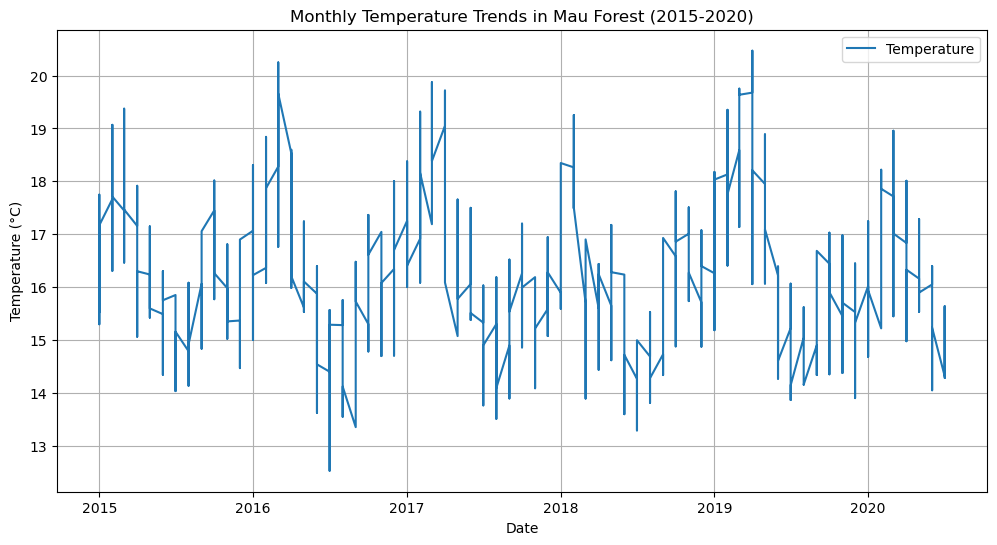

In [7]:
import matplotlib.pyplot as plt

# Plot temperature trends
plt.figure(figsize=(12, 6))
plt.plot(temperature_df['date'], temperature_df['temperature'], label='Temperature')
plt.title('Monthly Temperature Trends in Mau Forest (2015-2020)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


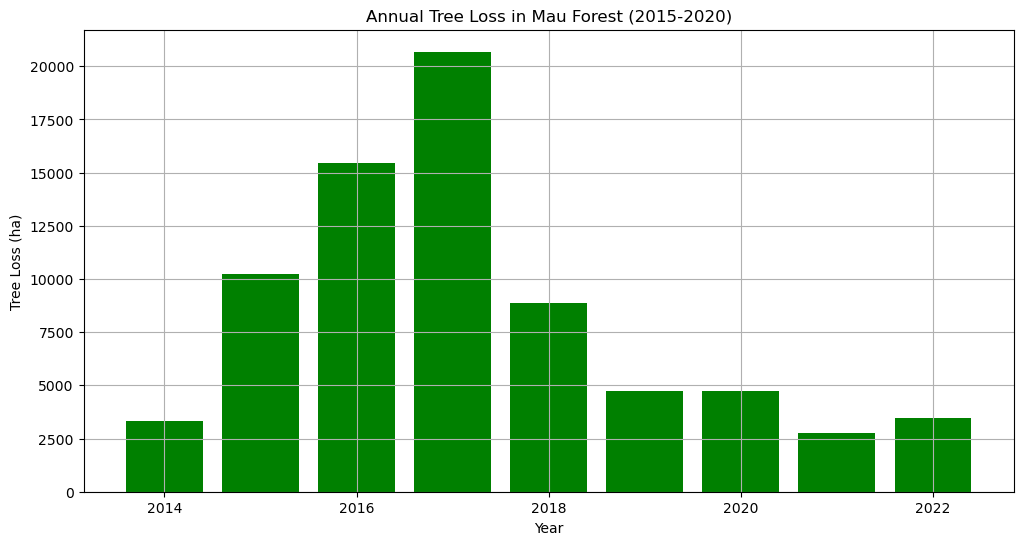

In [8]:
# Plot tree loss trends
plt.figure(figsize=(12, 6))
plt.bar(annual_tree_loss['year'], annual_tree_loss['tree_loss_ha'], color='green')
plt.title('Annual Tree Loss in Mau Forest (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Tree Loss (ha)')
plt.grid(True)
plt.show()


In [9]:
# Calculate annual average temperature
temperature_df['year'] = temperature_df['date'].dt.year
annual_avg_temp = temperature_df.groupby('year')['temperature'].mean().reset_index()


In [10]:
# Merge the datasets on the year column
merged_df = pd.merge(annual_avg_temp, annual_tree_loss, on='year')

# Calculate the correlation between tree loss and average temperature
correlation = merged_df['tree_loss_ha'].corr(merged_df['temperature'])

# Print the correlation result
print("\nCorrelation between annual tree loss and average temperature:", correlation)



Correlation between annual tree loss and average temperature: -0.011773819832604358


## Time Series Analysis

In [13]:
#Install necessary libraries for Time Series

import statsmodels.api as sm
import matplotlib.pyplot as plt


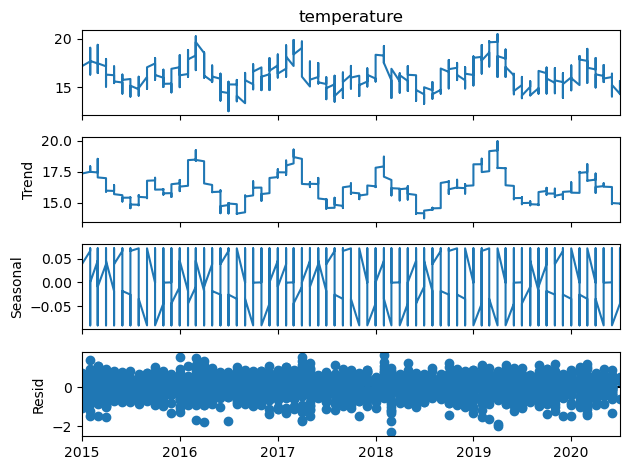

In [14]:

# Load the datasets
temperature_df = pd.read_csv('C:\\Users\\Lorrah\\Documents\\Hackathon GirlCode\\DataSets\\Monthly_Temperature_Mau_Forest_2015_2022.csv')

# Drop unnecessary columns
temperature_df = temperature_df.drop(columns=['system:index', '.geo'])

# Convert month and year to datetime
temperature_df['date'] = pd.to_datetime(temperature_df[['year', 'month']].assign(day=1))
temperature_df = temperature_df.drop(columns=['month', 'year'])

# Set the date column as the index
temperature_df.set_index('date', inplace=True)

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(temperature_df['temperature'], model='additive', period=12)
fig = decomposition.plot()
plt.show()


## ARIMA Model

In [15]:
import pandas as pd

# Load the temperature dataset
temperature_df = pd.read_csv('C:\\Users\\Lorrah\\Documents\\Hackathon GirlCode\\DataSets\\Monthly_Temperature_Mau_Forest_2015_2022.csv')
temperature_df = temperature_df.drop(columns=['system:index', '.geo'])
temperature_df['date'] = pd.to_datetime(temperature_df[['year', 'month']].assign(day=1))
temperature_df = temperature_df.drop(columns=['month', 'year'])
temperature_df.set_index('date', inplace=True)
temperature_df = temperature_df['2015-01-01':'2020-12-31']

# Load the tree loss dataset
tree_loss_df = pd.read_csv('C:\\Users\\Lorrah\Documents\\Hackathon GirlCode\\DataSets\\TreeLoss Mau Forest.csv')
tree_loss_df = tree_loss_df.drop(columns=['Unnamed: 15'])
tree_loss_df = pd.melt(tree_loss_df, id_vars=['country', 'subnational1', 'subnational2', 'threshold', 'area_ha', 'extent_2000_ha'],
                      var_name='year', value_name='tree_loss_ha')
tree_loss_df['year'] = tree_loss_df['year'].str.extract('(\d+)', expand=False).astype(int)
mau_forest_tree_loss = tree_loss_df.query("subnational1 == 'Baringo'").groupby('year')['tree_loss_ha'].sum().reset_index()


In [16]:
# Calculate annual average temperature
temperature_df['year'] = temperature_df.index.year
annual_avg_temp = temperature_df.groupby('year')['temperature'].mean().reset_index()

# Merge the datasets on the year column
merged_df = pd.merge(annual_avg_temp, mau_forest_tree_loss, on='year')


c:\Users\Lorrah\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lorrah\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                    6
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  -1.864
Date:                Fri, 28 Jun 2024   AIC                             11.728
Time:                        21:51:44   BIC                             10.166
Sample:                             0   HQIC                             7.535
                                  - 6                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
tree_loss_ha -1.434e-05   2.47e-05     -0.581      0.561   -6.27e-05     3.4e-05
ar.L1           -0.9620      0.107     -8.991      0.000      -1.172      -0.752
ma.L1           -0.9620     26.269     -0.03

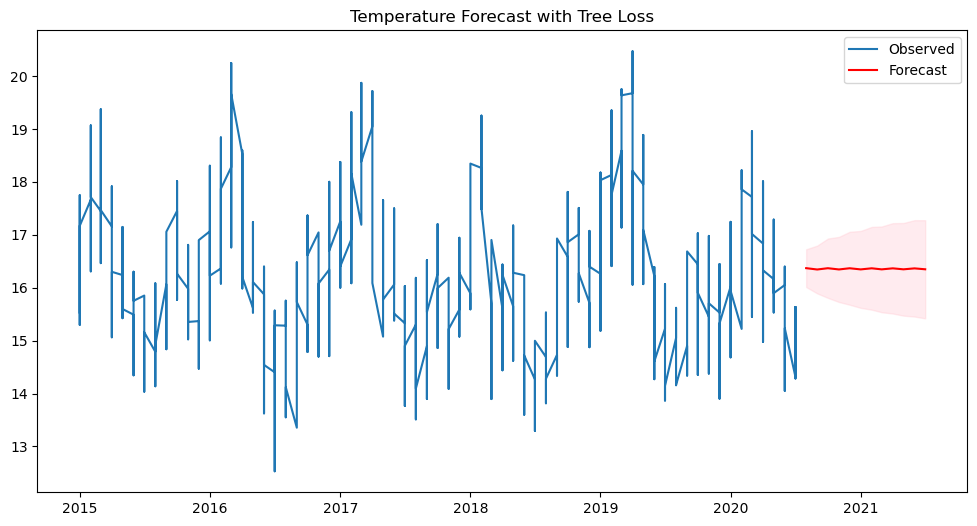

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit an ARIMAX model
arimax_model = SARIMAX(merged_df['temperature'], exog=merged_df['tree_loss_ha'], order=(1, 1, 1))
arimax_result = arimax_model.fit()

# Print model summary
print(arimax_result.summary())

# Forecast future values
future_tree_loss = [merged_df['tree_loss_ha'].values[-1]] * 12  # Assuming future tree loss stays constant
forecast = arimax_result.get_forecast(steps=12, exog=future_tree_loss)
forecast_df = forecast.summary_frame()

# Generate future dates for plotting
forecast_dates = pd.date_range(start=temperature_df.index[-1], periods=12, freq='M')

# Plot the observed data and forecast
plt.figure(figsize=(12, 6))
plt.plot(temperature_df.index, temperature_df['temperature'], label='Observed')
plt.plot(forecast_dates, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_dates, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.legend()
plt.title('Temperature Forecast with Tree Loss')
plt.show()


## Random Forest Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare the data
X = merged_df[['tree_loss_ha', 'year']]
y = merged_df['temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Feature importance
importance = rf_model.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')


Mean Absolute Error: 0.09980200397263417
Feature: tree_loss_ha, Score: 0.538649170893402
Feature: year, Score: 0.461350829106598


### Conclusion


This study of the Mau Forest in Kenya from 2015 to 2020 reveals a significant link between deforestation and temperature changes. This project underscores the critical impact of local deforestation on temperature fluctuations, contributing to wider climate change patterns. 
These findings are vital for creating targeted environmental policies and conservation strategies to mitigate the negative effects of deforestation on both local and global climates.

### Challenges

1. Obtaining sufficient and reliable temperature and deforestation data was a major challenge. Recording datasets in Kenya, particularly historical data, are often incomplete or inconsistent.
2. Variability in data collection methods and lack of standardized recording practices can affect the accuracy and reliability of the datasets.
3. Access restrictions on certain data platforms posed a significant challenge.

### Next Steps

1. Extend the analysis to cover a longer time period for more comprehensive insights into long-term trends and patterns. 
2. Explore advanced machine learning and deep learning techniques to capture complex interactions and improve prediction accuracy.
3. Include other environmental and socio-economic variables such as precipitation, land use changes, and human activities to enhance model accuracy and predictive power.